# My First Notebook

In [1]:
# Dependencies and Setup
import pandas as pd
import demoji
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_venn import venn2
from matplotlib_venn import venn3

# File to Load
chart_path = "spotify_charts.csv"

# Read Chart Data File and store into Pandas DataFrames
chart_data = pd.read_csv(chart_path, encoding='utf-8')

<font size="5">Question 1</font>

Which countries were the most influential on the global Spotify market?

In [2]:
# remove global from the regions column
regional_df = chart_data[chart_data["region"] != "Global"]

In [3]:
# count countries
len(regional_df['region'].unique())

68

In [4]:
#create new df based on region
top_countries = regional_df.groupby(['region'])[['total streams','artist']].sum()

#sort df to find top streaming countries
sorted_countries = top_countries.sort_values('total streams', ascending = False)

#variable for top ten countries
top_ten = sorted_countries.head(10)

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_45313/720861078.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_countries = regional_df.groupby(['region'])[['total streams','artist']].sum()


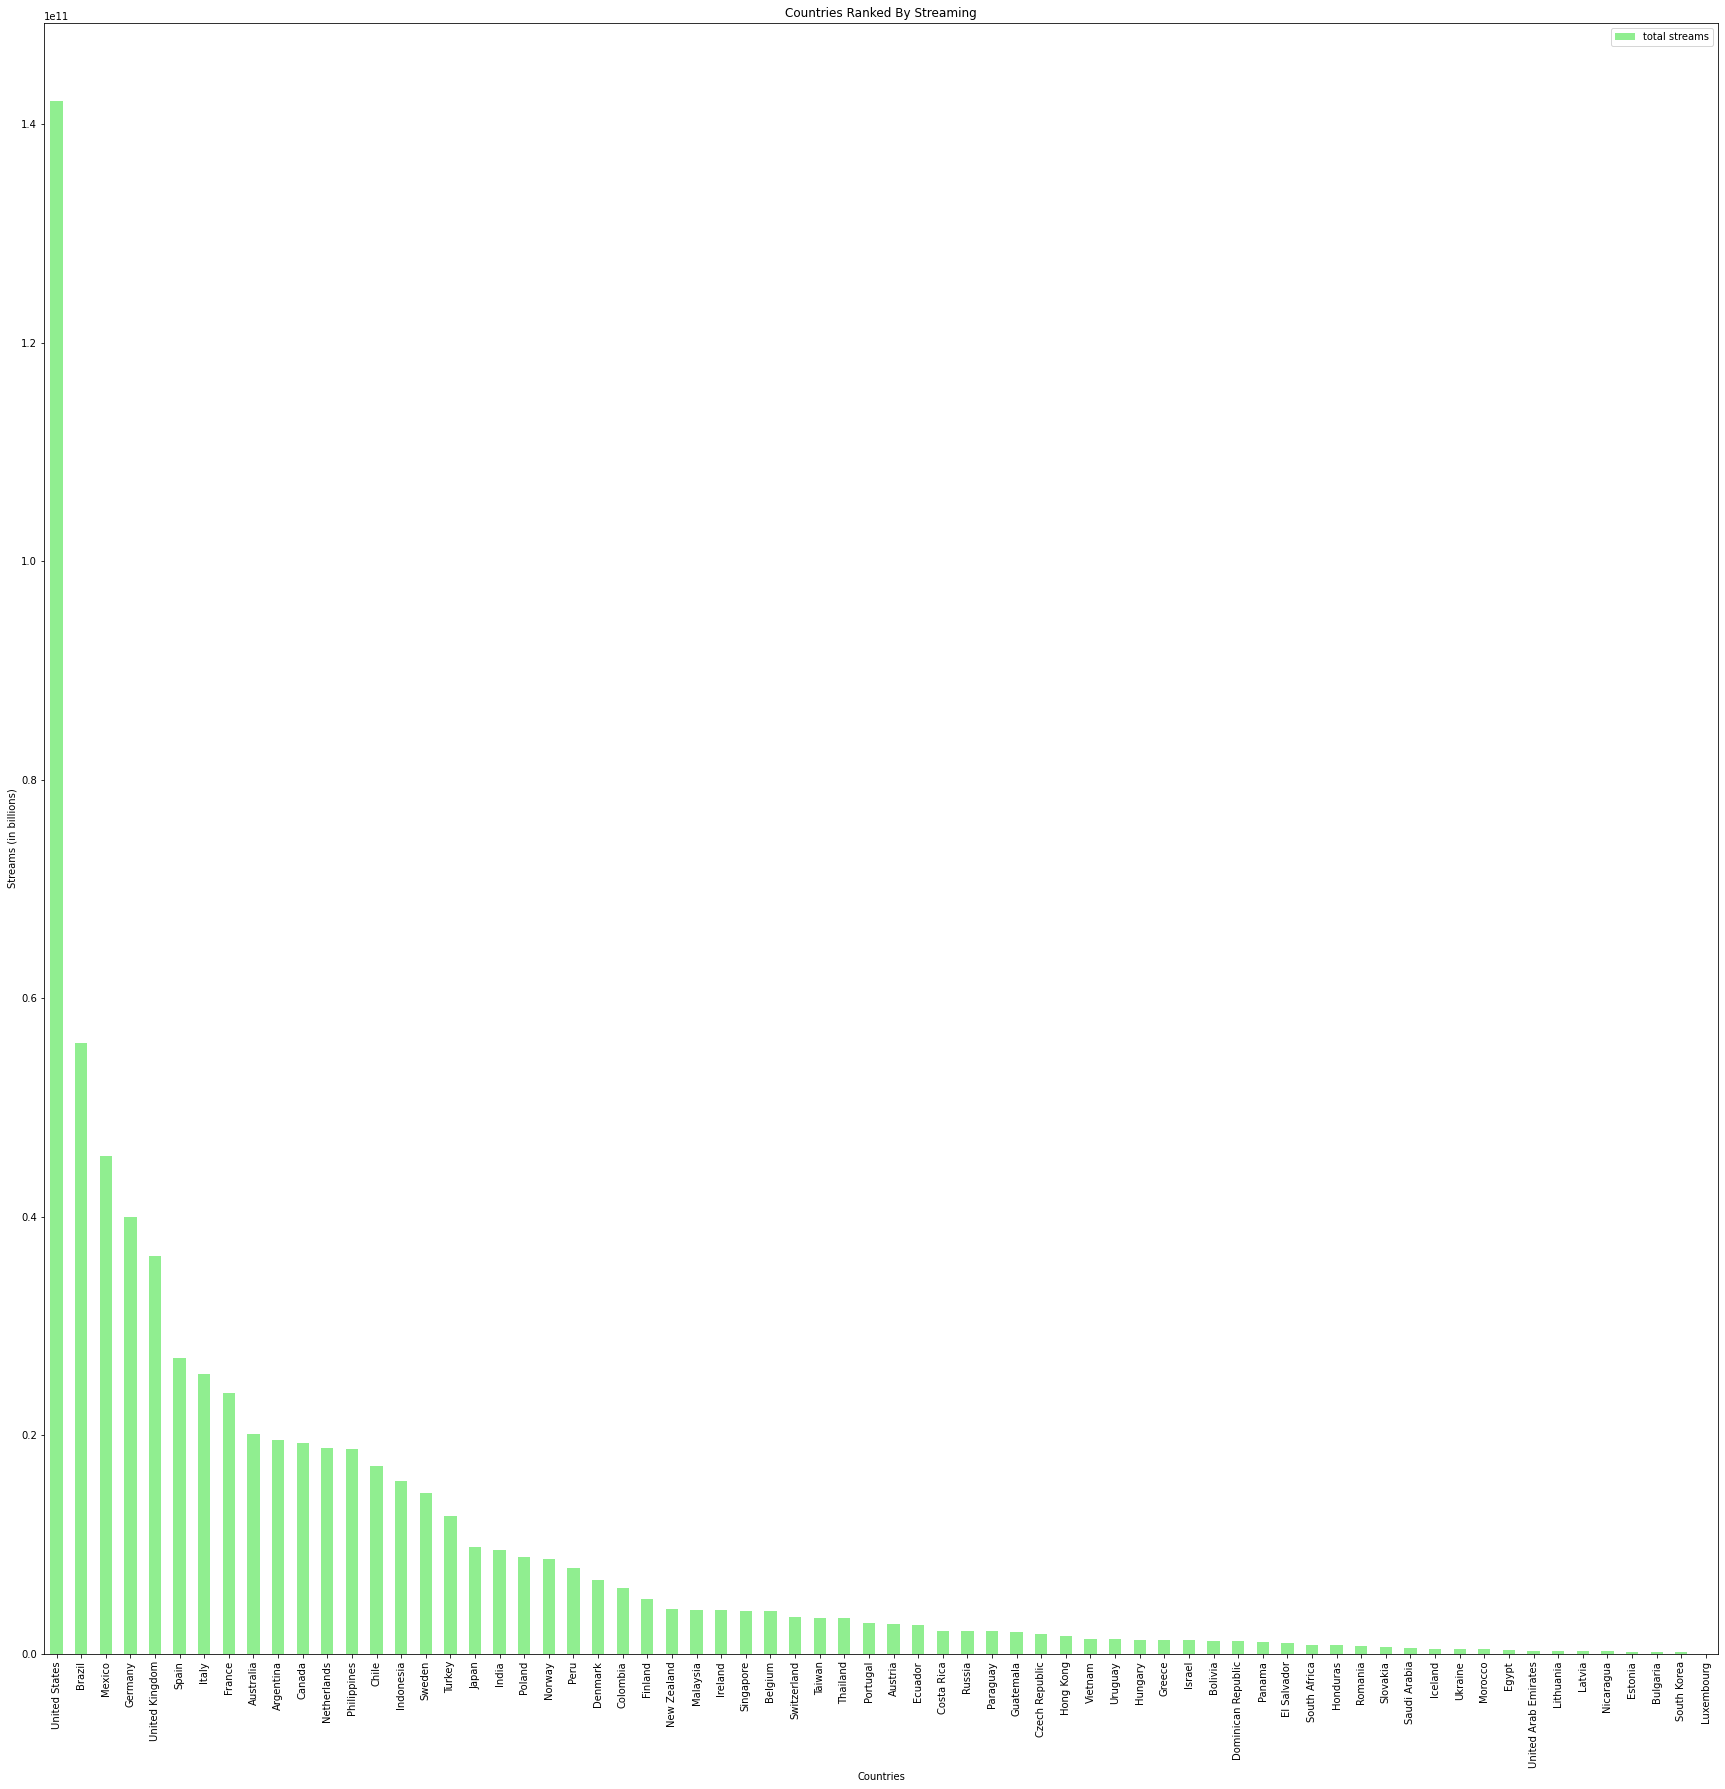

In [5]:
#create bar plot to show all countries streams 
sorted_countries_plot = sorted_countries.plot.bar(y='total streams', figsize =(30,30), width=.5, alpha=1, align="center", color = "lightgreen")

#adds title to bar chart  
plt.title("Countries Ranked By Streaming")

#label xaxis
plt.xlabel("Countries")

#lable yaxis
plt.ylabel("Streams (in billions)")

#rotate xticks to fit lables
plt.xticks(rotation = 90)

#export chart to pngs
plt.savefig("Countries_By_Streaming.png")

#show graph 
plt.show() 

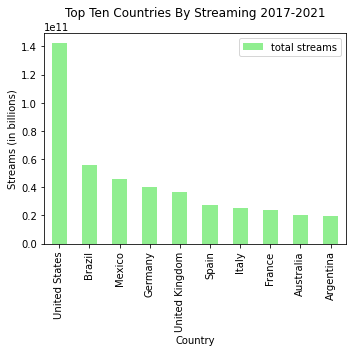

In [6]:
#create bar plot to show top 10 countries streams 
top_countries_plot = top_ten.plot.bar(y='total streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Top Ten Countries By Streaming 2017-2021")

#label xaxis
plt.xlabel("Country")

#lable yaxis
plt.ylabel("Streams (in billions)")

#top_countries_plot.bar_label(top_countries["total streams"], label_type='edge')

#adjust graph layout 
plt.tight_layout()

#export chart to pngs
plt.savefig("Top_Ten_Countries_by_Streaming.png")

#show graph 
plt.show()

In [7]:
#Find total streams for US
us = regional_df.loc[regional_df["region"] == "United States"]

#sum total streams
us_streaming = us["total streams"].sum()

#Find total streams overall
overall = regional_df.loc[regional_df["region"] != "United States"]

#Sum total streams overall
overall_streaming = overall["total streams"].sum()

#Calcuate percent of streams that are from US
us_percent_streaming = (us_streaming/overall_streaming) * 100

#print streaming percentage
us_percent_streaming

print(f"The U.S. market makes up {us_percent_streaming}% of the total global Spotify streams from 2017-2021.")

The U.S. market makes up 26.24403370895535% of the total global Spotify streams from 2017-2021.


In [8]:
#BRANCHED CODE:
#pie chart comparing total US streams to all other regions:

#remove global and United States from the regions column
non_us_df = chart_data[(chart_data["region"] != "Global") & (chart_data["region"] != "United States")]
non_us_df['total streams'].sum()

#count countries - 
countries_count = [non_us_df['total streams'].sum(),us['total streams'].sum()]
countries_count

usvglobe_dict = pd.DataFrame({'Country': ['International', 'United States'],
                          'Total Countries':countries_count})

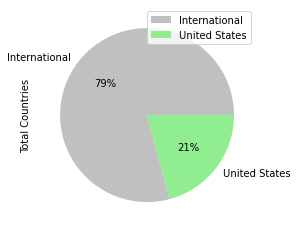

In [9]:
colors = ['silver', 'lightgreen']
usvglobe_dict.groupby(['Country']).sum().plot(kind='pie', y='Total Countries',autopct='%1.0f%%',colors=colors)

#export chart to pngs
plt.savefig("US_Streaming_Percentage.png")

plt.show()

<font size="5">Question 2</font>

What are the top ranked songs globally and in the top streaming country?

Top Songs 2017

In [11]:
#create datframe for US 2017
df_2017 = regional_df[(regional_df["date"] == 2017)]

#sort df by total streams 
songs_2017 = df_2017.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_2017 = songs_2017.head(10)

#save top 100 rows by streaming 
top_songs_2017_ext = songs_2017.head(100)

#print top ten
top_songs_2017

,date,title,artist,region,total streams
20921,2017,HUMBLE.,Kendrick Lamar,United States,334342280.0
11196,2017,Congratulations,"Post Malone, Quavo",United States,280284916.0
48223,2017,Shape of You,Ed Sheeran,United States,278916058.0
33970,2017,Mask Off,Future,United States,239307360.0
12993,2017,Despacito - Remix,"Luis Fonsi, Daddy Yankee, Justin Bieber",United States,232299068.0
64210,2017,rockstar,"Post Malone, 21 Savage",United States,225517132.0
64085,2017,iSpy (feat. Lil Yachty),KYLE,United States,224773101.0
31732,2017,Location,Khalid,United States,222266305.0
268,2017,1-800-273-8255,"Logic, Alessia Cara, Khalid",United States,216950629.0
58449,2017,Unforgettable,"French Montana, Swae Lee",United States,215180711.0


In [12]:
#create datframe for US 2017
df_US_2017 = regional_df[(regional_df["region"] == "United States") & (regional_df["date"] == 2017)]

#sort df by total streams 
songs_US_2017 = df_US_2017.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_US_2017 = songs_US_2017.head(10)

#save top 100 rows by streaming 
top_songs_US_2017_ext = songs_US_2017.head(100)

#print top ten
top_songs_US_2017

,date,title,artist,region,total streams
20921,2017,HUMBLE.,Kendrick Lamar,United States,334342280.0
11196,2017,Congratulations,"Post Malone, Quavo",United States,280284916.0
48223,2017,Shape of You,Ed Sheeran,United States,278916058.0
33970,2017,Mask Off,Future,United States,239307360.0
12993,2017,Despacito - Remix,"Luis Fonsi, Daddy Yankee, Justin Bieber",United States,232299068.0
64210,2017,rockstar,"Post Malone, 21 Savage",United States,225517132.0
64085,2017,iSpy (feat. Lil Yachty),KYLE,United States,224773101.0
31732,2017,Location,Khalid,United States,222266305.0
268,2017,1-800-273-8255,"Logic, Alessia Cara, Khalid",United States,216950629.0
58449,2017,Unforgettable,"French Montana, Swae Lee",United States,215180711.0


In [13]:
#create variable for top ten songs 
top_songs_17 = top_songs_US_2017["title"]

#append variable to add global top ten songs 
new_top_2017 = top_songs_17.append(top_songs_2017["title"])

new_top_2017 = new_top_2017.drop_duplicates()

#create variable for US total streams 
us_songs_2017 = top_songs_US_2017["total streams"]

#create variable for global total streams 
global_songs_2017 = top_songs_2017["total streams"]

#print 
new_top_2017

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_45313/3145452642.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_top_2017 = top_songs_17.append(top_songs_2017["title"])


20921                    HUMBLE.
11196            Congratulations
48223               Shape of You
33970                   Mask Off
12993          Despacito - Remix
64210                   rockstar
64085    iSpy (feat. Lil Yachty)
31732                   Location
268               1-800-273-8255
58449              Unforgettable
Name: title, dtype: object

In [14]:
#create df for global vs us streams 
global_vs_us_2017 = pd.DataFrame({"Songs": new_top_2017, "US Streams": us_songs_2017, "Global Streams": global_songs_2017})

#reset df index
global_vs_us_2017 = global_vs_us_2017.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2017['Global Streams'] = global_vs_us_2017['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2017['US Streams'] = global_vs_us_2017['US Streams'].fillna(0)

#print df
global_vs_us_2017

,Songs,US Streams,Global Streams
0,1-800-273-8255,216950629.0,216950629.0
1,Congratulations,280284916.0,280284916.0
2,Despacito - Remix,232299068.0,232299068.0
3,HUMBLE.,334342280.0,334342280.0
4,Location,222266305.0,222266305.0
5,Mask Off,239307360.0,239307360.0
6,Shape of You,278916058.0,278916058.0
7,Unforgettable,215180711.0,215180711.0
8,iSpy (feat. Lil Yachty),224773101.0,224773101.0
9,rockstar,225517132.0,225517132.0


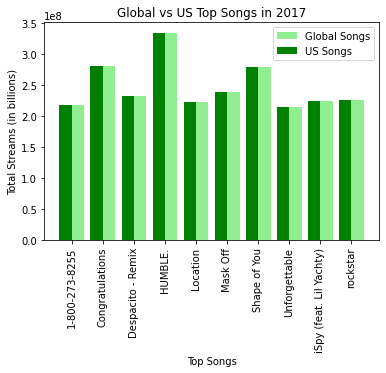

In [15]:
#create x vaiable 
unique_top_songs = global_vs_us_2017["Songs"]

#define x variable
X = unique_top_songs

#define y variable #1
global_songs = global_vs_us_2017["Global Streams"]

#define y variable #2
us_songs = global_vs_us_2017["US Streams"]

#define length of x-axis
X_axis = np.arange(len(X))

#add colors 
color1 = "lightgreen"
color2 = "green"

#plot y variable #1
plt.bar(X_axis + 0.2, global_songs, 0.4, label = 'Global Songs', color=color1)

#plot y variable #2
plt.bar(X_axis - 0.2, us_songs, 0.4, label = 'US Songs', color=color2)

#plot x ticks
plt.xticks(X_axis, X)

#rotate x ticks
plt.xticks(rotation = 90)

#create labels 
plt.xlabel("Top Songs")
plt.ylabel("Total Streams (in billions)")

#create title 
plt.title("Global vs US Top Songs in 2017")

#plot legend 
plt.legend()

#export chart to pngs
plt.savefig("Global_vs_US_top_songs_2017.png")

#show plot
plt.show()

In [16]:
#find songs that appear on both top lists
both = global_vs_us_2017.loc[(global_vs_us_2017["US Streams"] > 0) & (global_vs_us_2017["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_2017["title"].count()

#find percent of US songs that appear in global top ten
song_percent_2017 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2017}% of the same top ten songs as the global charts in 2017.") 

The US charts had 100.0% of the same top ten songs as the global charts in 2017.


Further analysis into the top 100 songs for 2017

In [17]:
#create variable for top 100 songs 
top_songs_17 = top_songs_US_2017_ext["title"]

#append variable to add global top 100 songs 
new_top_2017 = top_songs_17.append(top_songs_2017_ext["title"])

#drop duplicate values 
new_top_2017 = new_top_2017.drop_duplicates()

#create variable for US total streams 
us_songs_2017 = top_songs_US_2017_ext["total streams"]

#create variable for global total streams 
global_songs_2017 = top_songs_2017_ext["total streams"]

#print
new_top_2017

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_45313/4219784321.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_top_2017 = top_songs_17.append(top_songs_2017_ext["title"])


20921                                       HUMBLE.
11196                               Congratulations
48223                                  Shape of You
33970                                      Mask Off
12993                             Despacito - Remix
                            ...                    
53132    Swalla (feat. Nicki Minaj & Ty Dolla $ign)
42394                                    Plain Jane
34271                                     Me Rehúso
17500                                 Felices los 4
21773                                   Hear Me Now
Name: title, Length: 103, dtype: object

In [18]:
#create df for global vs us streams 
global_vs_us_2017 = pd.DataFrame({"Songs": new_top_2017, "US Streams": us_songs_2017, "Global Streams": global_songs_2017})

#reset df index
global_vs_us_2017 = global_vs_us_2017.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2017['Global Streams'] = global_vs_us_2017['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2017['US Streams'] = global_vs_us_2017['US Streams'].fillna(0)

#print df
global_vs_us_2017

,Songs,US Streams,Global Streams
0,1-800-273-8255,216950629.0,216950629.0
1,24K Magic,75607599.0,0.0
2,Attention,121686882.0,121686882.0
3,BUTTERFLY EFFECT,136894774.0,136894774.0
4,Bad and Boujee (feat. Lil Uzi Vert),209209558.0,209209558.0
...,...,...,...
98,goosebumps,196490882.0,196490882.0
99,iSpy (feat. Lil Yachty),224773101.0,224773101.0
100,pick up the phone,83598597.0,83598597.0
101,rockstar,225517132.0,225517132.0


In [19]:
#find songs that appear on both top lists
both = global_vs_us_2017.loc[(global_vs_us_2017["US Streams"] > 0) & (global_vs_us_2017["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_2017_ext["title"].count()

#find percent of US songs that appear in global top ten
song_percent_2017 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2017}% of the same top 100 songs as the global charts in 2017.")

The US charts had 90.0% of the same top 100 songs as the global charts in 2017.


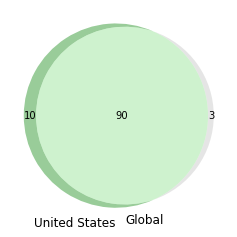

In [20]:
#create venn diagram
venn2([set(top_songs_US_2017_ext["title"]),
       set(top_songs_2017_ext["title"])],
       set_labels=('United States', 'Global'),
       set_colors=('green', 'silver'))

#export chart to pngs
plt.savefig("_top_songs_2017_venn.png")

Top Songs 2018

In [21]:
#create datframe for US 2017
df_2018 = regional_df[(regional_df["date"] == 2018)]

#sort df by total streams 
songs_2018 = df_2018.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_2018 = songs_2018.head(10)

#save top 100 rows by streaming 
top_songs_2018_ext = songs_2018.head(100)

#print top ten
top_songs_2018


,date,title,artist,region,total streams
91563,2018,God's Plan,Drake,United States,453226629.0
122834,2018,SAD!,XXXTENTACION,United States,332633597.0
119442,2018,Psycho (feat. Ty Dolla $ign),Post Malone,United States,306877012.0
106537,2018,Lucid Dreams,Juice WRLD,United States,299907223.0
105578,2018,Look Alive (feat. Drake),BlocBoy JB,United States,266861797.0
112843,2018,Nice For What,Drake,United States,263455062.0
74661,2018,Better Now,Post Malone,United States,254098207.0
98444,2018,In My Feelings,Drake,United States,245715031.0
110459,2018,Moonlight,XXXTENTACION,United States,245410462.0
96383,2018,I Like It,"Cardi B, Bad Bunny, J Balvin",United States,240430007.0


In [22]:
#create datframe for US 2018
df_US_2018 = regional_df[(regional_df["region"] == "United States") & (regional_df["date"] == 2018)]

#sort df by total streams 
songs_US_2018 = df_US_2018.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_US_2018 = songs_US_2018.head(10)

#save top 100 rows by streaming 
top_songs_US_2018_ext = songs_US_2018.head(100)

#print top ten
top_songs_US_2018

,date,title,artist,region,total streams
91563,2018,God's Plan,Drake,United States,453226629.0
122834,2018,SAD!,XXXTENTACION,United States,332633597.0
119442,2018,Psycho (feat. Ty Dolla $ign),Post Malone,United States,306877012.0
106537,2018,Lucid Dreams,Juice WRLD,United States,299907223.0
105578,2018,Look Alive (feat. Drake),BlocBoy JB,United States,266861797.0
112843,2018,Nice For What,Drake,United States,263455062.0
74661,2018,Better Now,Post Malone,United States,254098207.0
98444,2018,In My Feelings,Drake,United States,245715031.0
110459,2018,Moonlight,XXXTENTACION,United States,245410462.0
96383,2018,I Like It,"Cardi B, Bad Bunny, J Balvin",United States,240430007.0


In [23]:
#create variable for top songs 
top_songs_18 = top_songs_US_2018["title"]

#append variable to add global top songs 
new_top_2018 = top_songs_18.append(top_songs_2018["title"])

#drop duplicate values 
new_top_2018 = new_top_2018.drop_duplicates()

#create variable for US total streams 
us_songs_2018 = top_songs_US_2018[("total streams")]

#create variable for global total streams 
global_songs_2018 = top_songs_2018[("total streams")]

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_45313/3751497983.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_top_2018 = top_songs_18.append(top_songs_2018["title"])


In [24]:
#create df for global vs us streams 
global_vs_us_2018 = pd.DataFrame({"Songs": new_top_2018, "US Streams": us_songs_2018, "Global Streams": global_songs_2018})

#reset df index
global_vs_us_2018 = global_vs_us_2018.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2018['Global Streams'] = global_vs_us_2018['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2018['US Streams'] = global_vs_us_2018['US Streams'].fillna(0)

#print df
global_vs_us_2018

,Songs,US Streams,Global Streams
0,Better Now,254098207.0,254098207.0
1,God's Plan,453226629.0,453226629.0
2,I Like It,240430007.0,240430007.0
3,In My Feelings,245715031.0,245715031.0
4,Look Alive (feat. Drake),266861797.0,266861797.0
5,Lucid Dreams,299907223.0,299907223.0
6,Moonlight,245410462.0,245410462.0
7,Nice For What,263455062.0,263455062.0
8,Psycho (feat. Ty Dolla $ign),306877012.0,306877012.0
9,SAD!,332633597.0,332633597.0


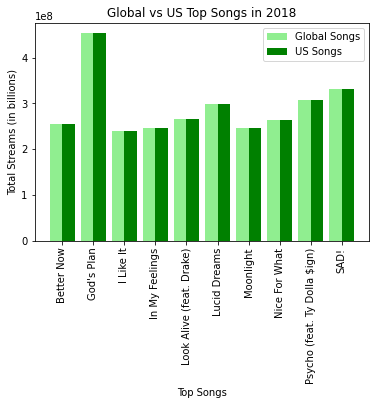

In [25]:

#create x variable 
unique_top_songs = global_vs_us_2018["Songs"]

#define x variable
X = unique_top_songs

#define y variable #1
global_songs = global_vs_us_2018["Global Streams"]

#define y variable #2
us_songs = global_vs_us_2018["US Streams"]

#define length of x-axis
X_axis = np.arange(len(X))

#add colors 
color1 = "lightgreen"
color2 = "green"

#plot y variable #1
plt.bar(X_axis - 0.2, global_songs, 0.4, label = 'Global Songs', color=color1)

#plot y variable #2
plt.bar(X_axis + 0.2, us_songs, 0.4, label = 'US Songs', color=color2)

#plot x ticks
plt.xticks(X_axis, X)

#rotate x ticks
plt.xticks(rotation = 90)

#create labels 
plt.xlabel("Top Songs")
plt.ylabel("Total Streams (in billions)")

#create title 
plt.title("Global vs US Top Songs in 2018")

#plot legend 
plt.legend()

#export chart to pngs
plt.savefig("Global_vs_US_top_songs_2018.png")

#show plot
plt.show()

Further analysis into the top 100 songs for 2018

In [26]:
#find songs that appear on both top lists
both = global_vs_us_2018.loc[(global_vs_us_2018["US Streams"] > 0) & (global_vs_us_2018["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_2018["title"].count()

#find percent of US songs that appear in global top ten
song_percent_2018 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2018}% of the same top 10 songs as the global charts in 2018.")

The US charts had 100.0% of the same top 10 songs as the global charts in 2018.


In [27]:
#create variable for top songs 
top_songs_18 = top_songs_US_2018_ext["title"]

#append variable to add global top songs 
new_top_2018 = top_songs_18.append(top_songs_2018_ext["title"])

#drop duplicate values
new_top_2018 = new_top_2018.drop_duplicates()

#create variable for US total streams 
us_songs_2018 = top_songs_US_2018_ext[("total streams")]

#create variable for global total streams 
global_songs_2018 = top_songs_2018_ext[("total streams")]


/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_45313/1162013050.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_top_2018 = top_songs_18.append(top_songs_2018_ext["title"])


In [28]:
#create df for global vs us streams 
global_vs_us_2018 = pd.DataFrame({"Songs": new_top_2018, "US Streams": us_songs_2018, "Global Streams": global_songs_2018})

#reset df index
global_vs_us_2018 = global_vs_us_2018.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2018['Global Streams'] = global_vs_us_2018['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2018['US Streams'] = global_vs_us_2018['US Streams'].fillna(0)

#print df
global_vs_us_2018

,Songs,US Streams,Global Streams
0,1-800-273-8255,95414792.0,95414792.0
1,All Girls Are The Same,143447522.0,143447522.0
2,All The Stars (with SZA),185113340.0,185113340.0
3,Ao Vivo E A Cores,0.0,95452766.0
4,BUTTERFLY EFFECT,114999546.0,114999546.0
...,...,...,...
100,no tears left to cry,142630901.0,142630901.0
101,rockstar,112816631.0,112816631.0
102,rockstar (feat. 21 Savage),152300383.0,152300383.0
103,"thank u, next",124951058.0,124951058.0


In [29]:
#find songs that appear on both top lists
both = global_vs_us_2018.loc[(global_vs_us_2018["US Streams"] > 0) & (global_vs_us_2018["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_2018_ext["title"].count()

#find percent of US songs that appear in global top ten
song_percent_2018 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2018}% of the same top 100 songs as the global charts in 2018.")

The US charts had 93.0% of the same top 100 songs as the global charts in 2018.


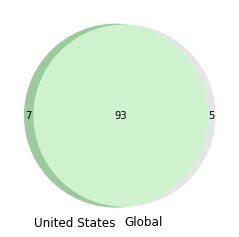

In [30]:
#create venn diagram
venn2([set(top_songs_US_2018_ext["title"]),
       set(top_songs_2018_ext["title"])],
       set_labels=('United States', 'Global'),
       set_colors=('green', 'silver'))

#export chart to pngs
plt.savefig("_top_songs_2018_venn.png")

Top Songs 2019

In [31]:
#create datframe for US 2019
df_2019 = regional_df[(regional_df["date"] == 2019)]

#sort df by total streams 
songs_2019 = df_2019.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_2019 = songs_2019.head(10)

#save top 100 rows by streaming 
top_songs_2019_ext = songs_2019.head(100)

#print top ten
top_songs_2019

,date,title,artist,region,total streams
211054,2019,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",United States,389059531.0
221240,2019,Wow.,Post Malone,United States,297846574.0
150460,2019,7 rings,Ariana Grande,United States,280698165.0
188644,2019,MIDDLE CHILD,J. Cole,United States,277704991.0
222912,2019,bad guy,Billie Eilish,United States,266782562.0
173001,2019,Going Bad (feat. Drake),Meek Mill,United States,242889031.0
216312,2019,Truth Hurts,Lizzo,United States,239980228.0
202689,2019,Ransom,Lil Tecca,United States,214034982.0
166353,2019,Drip Too Hard (Lil Baby & Gunna),Lil Baby,United States,208752215.0
211530,2019,Swervin (feat. 6ix9ine),A Boogie Wit da Hoodie,United States,205758012.0


In [32]:
#create datframe for US 2019
df_US_2019 = regional_df[(regional_df["region"] == "United States") & (regional_df["date"] == 2019)]

#sort df by total streams 
songs_US_2019 = df_US_2019.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_US_2019 = songs_US_2019.head(10)

#save top 100 rows by streaming 
top_songs_US_2019_ext = songs_2019.head(100)

#print top ten
top_songs_US_2019

,date,title,artist,region,total streams
211054,2019,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",United States,389059531.0
221240,2019,Wow.,Post Malone,United States,297846574.0
150460,2019,7 rings,Ariana Grande,United States,280698165.0
188644,2019,MIDDLE CHILD,J. Cole,United States,277704991.0
222912,2019,bad guy,Billie Eilish,United States,266782562.0
173001,2019,Going Bad (feat. Drake),Meek Mill,United States,242889031.0
216312,2019,Truth Hurts,Lizzo,United States,239980228.0
202689,2019,Ransom,Lil Tecca,United States,214034982.0
166353,2019,Drip Too Hard (Lil Baby & Gunna),Lil Baby,United States,208752215.0
211530,2019,Swervin (feat. 6ix9ine),A Boogie Wit da Hoodie,United States,205758012.0


In [33]:
#create variable for top songs 
top_songs_19 = top_songs_US_2019["title"]

#append variable to add global top songs 
new_top_2019 = top_songs_19.append(top_songs_2019["title"])

new_top_2019 = new_top_2019.drop_duplicates()

#create variable for US total streams 
us_songs_2019 = top_songs_US_2019["total streams"]

#create variable for global total streams 
global_songs_2019 = top_songs_2019["total streams"]

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_45313/626330018.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_top_2019 = top_songs_19.append(top_songs_2019["title"])


In [34]:
#create df for global vs us streams 
global_vs_us_2019 = pd.DataFrame({"Songs": new_top_2019, "US Streams": us_songs_2019, "Global Streams": global_songs_2019})

#reset df index
global_vs_us_2019 = global_vs_us_2019.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2019['Global Streams'] = global_vs_us_2019['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2019['US Streams'] = global_vs_us_2019['US Streams'].fillna(0)

#print df
global_vs_us_2019

,Songs,US Streams,Global Streams
0,7 rings,280698165.0,280698165.0
1,Drip Too Hard (Lil Baby & Gunna),208752215.0,208752215.0
2,Going Bad (feat. Drake),242889031.0,242889031.0
3,MIDDLE CHILD,277704991.0,277704991.0
4,Ransom,214034982.0,214034982.0
5,Sunflower - Spider-Man: Into the Spider-Verse,389059531.0,389059531.0
6,Swervin (feat. 6ix9ine),205758012.0,205758012.0
7,Truth Hurts,239980228.0,239980228.0
8,Wow.,297846574.0,297846574.0
9,bad guy,266782562.0,266782562.0


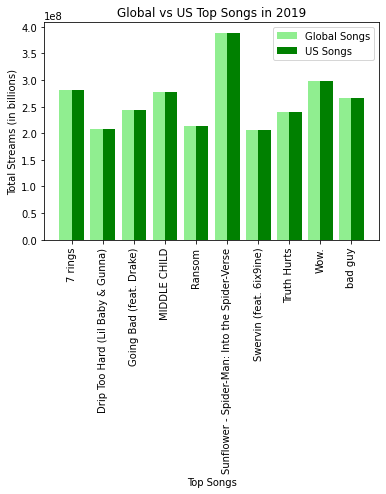

In [35]:
#create x variable 
unique_top_songs = global_vs_us_2019["Songs"]

#define x variable
X = unique_top_songs

#define y variable #1
global_songs = global_vs_us_2019["Global Streams"]

#define y variable #2
us_songs = global_vs_us_2019["US Streams"]

#define length of x-axis
X_axis = np.arange(len(X))

#add colors 
color1 = "lightgreen"
color2 = "green"

#plot y variable #1
plt.bar(X_axis - 0.2, global_songs, 0.4, label = 'Global Songs', color=color1)

#plot y variable #2
plt.bar(X_axis + 0.2, us_songs, 0.4, label = 'US Songs', color=color2)

#plot x ticks
plt.xticks(X_axis, X)

#rotate x ticks
plt.xticks(rotation = 90)

#create labels 
plt.xlabel("Top Songs")
plt.ylabel("Total Streams (in billions)")

#create title 
plt.title("Global vs US Top Songs in 2019")

#plot legend 
plt.legend()

#export chart to pngs
plt.savefig("Global_vs_US_top_songs_2019.png")

#show plot
plt.show()

In [36]:
#find songs that appear on both top lists
both = global_vs_us_2019.loc[(global_vs_us_2019["US Streams"] > 0) & (global_vs_us_2019["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_2019["title"].count()

#find percent of US songs that appear in global top ten
song_percent_2019 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2019}% of the same top ten songs as the global charts in 2019.")

The US charts had 100.0% of the same top ten songs as the global charts in 2019.


Further analysis into the top 100 songs in 2019

In [37]:
#create variable for top songs 
top_songs_19 = top_songs_US_2019_ext["title"]

#append variable to add global top songs 
new_top_2019 = top_songs_19.append(top_songs_2019_ext["title"])

#drop duplicate values
new_top_2019 = new_top_2019.drop_duplicates()

#create variable for US total streams 
us_songs_2019 = top_songs_US_2019_ext["total streams"]

#create variable for global total streams 
global_songs_2019 = top_songs_2019_ext["total streams"]

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_45313/3858844029.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_top_2019 = top_songs_19.append(top_songs_2019_ext["title"])


In [38]:
#create df for global vs us streams 
global_vs_us_2019 = pd.DataFrame({"Songs": new_top_2019, "US Streams": us_songs_2019, "Global Streams": global_songs_2019})

#reset df index
global_vs_us_2019 = global_vs_us_2019.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2019['Global Streams'] = global_vs_us_2019['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2019['US Streams'] = global_vs_us_2019['US Streams'].fillna(0)

#print df
global_vs_us_2019

,Songs,US Streams,Global Streams
0,223's (feat. 9lokknine),95746470.0,95746470.0
1,7 rings,280698165.0,280698165.0
2,All Girls Are The Same,109923109.0,109923109.0
3,Armed And Dangerous,116512886.0,116512886.0
4,Atrasadinha - Ao Vivo,99621849.0,99621849.0
...,...,...,...
94,hot girl bummer,97900605.0,97900605.0
95,rockstar (feat. 21 Savage),130084723.0,130084723.0
96,"thank u, next",182180801.0,182180801.0
97,when the party's over,177211774.0,177211774.0


In [39]:
#find songs that appear on both top lists
both = global_vs_us_2019.loc[(global_vs_us_2019["US Streams"] > 0) & (global_vs_us_2019["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_2019_ext["title"].count()

#find percent of US songs that appear in global top ten
song_percent_2019 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2019}% of the same top 100 songs as the global charts in 2019.")

The US charts had 99.0% of the same top 100 songs as the global charts in 2019.


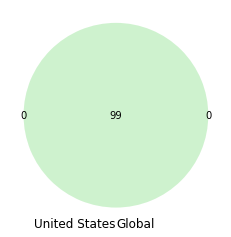

In [40]:
#create venn diagram
venn2([set(top_songs_US_2019_ext["title"]),
       set(top_songs_2019_ext["title"])],
       set_labels=('United States', 'Global'),
       set_colors=('green', 'silver'))

#export chart to pngs
plt.savefig("top_songs_2019_venn.png")

In [41]:
#create datframe for US 2017
df_2020 = regional_df[(regional_df["date"] == 2020)]

#sort df by total streams 
songs_2020 = df_2020.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_2020 = songs_2020.head(10)

#save top 100 rows by streaming 
top_songs_2020_ext = songs_2020.head(100)

#print top ten
top_songs_2020

,date,title,artist,region,total streams
300559,2020,The Box,Roddy Ricch,United States,400892436.0
237940,2020,Blinding Lights,The Weeknd,United States,331037132.0
238354,2020,Blueberry Faygo,Lil Mosey,United States,272855565.0
286988,2020,ROCKSTAR (feat. Roddy Ricch),DaBaby,United States,268822544.0
269526,2020,Life Is Good (feat. Drake),Future,United States,240623838.0
242340,2020,Circles,Post Malone,United States,219423327.0
287132,2020,ROXANNE,Arizona Zervas,United States,202582156.0
306327,2020,WAP (feat. Megan Thee Stallion),Cardi B,United States,200800495.0
307090,2020,Watermelon Sugar,Harry Styles,United States,200626866.0
306431,2020,WHATS POPPIN,Jack Harlow,United States,189004912.0


In [42]:
#create datframe for US 2020
df_US_2020 = regional_df[(regional_df["region"] == "United States") & (regional_df["date"] == 2020)]

#sort df by total streams 
songs_US_2020 = df_US_2020.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_US_2020 = songs_US_2020.head(10)

#save top 100 rows by streaming 
top_songs_US_2020_ext = songs_US_2020.head(100)

#print top ten
top_songs_US_2020

,date,title,artist,region,total streams
300559,2020,The Box,Roddy Ricch,United States,400892436.0
237940,2020,Blinding Lights,The Weeknd,United States,331037132.0
238354,2020,Blueberry Faygo,Lil Mosey,United States,272855565.0
286988,2020,ROCKSTAR (feat. Roddy Ricch),DaBaby,United States,268822544.0
269526,2020,Life Is Good (feat. Drake),Future,United States,240623838.0
242340,2020,Circles,Post Malone,United States,219423327.0
287132,2020,ROXANNE,Arizona Zervas,United States,202582156.0
306327,2020,WAP (feat. Megan Thee Stallion),Cardi B,United States,200800495.0
307090,2020,Watermelon Sugar,Harry Styles,United States,200626866.0
306431,2020,WHATS POPPIN,Jack Harlow,United States,189004912.0


In [44]:
#create variable for top songs 
top_songs_20 = top_songs_US_2020["title"]

#append variable to add global top songs 
new_top_2020 = top_songs_20.append(top_songs_2020["title"])

#drop duplicate values
new_top_2020 = new_top_2020.drop_duplicates()

#create variable for US total streams 
us_songs_2020 = top_songs_US_2020["total streams"]

#create variable for global total streams 
global_songs_2020 = top_songs_2020["total streams"]

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_45313/640626232.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_top_2020 = top_songs_20.append(top_songs_2020["title"])


In [45]:
#create df for global vs us streams 
global_vs_us_2020 = pd.DataFrame({"Songs": new_top_2020, "US Streams": us_songs_2020, "Global Streams": global_songs_2020})

#reset df index
global_vs_us_2020 = global_vs_us_2020.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2020['Global Streams'] = global_vs_us_2020['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2020['US Streams'] = global_vs_us_2020['US Streams'].fillna(0)

#print df
global_vs_us_2020

,Songs,US Streams,Global Streams
0,Blinding Lights,331037132.0,331037132.0
1,Blueberry Faygo,272855565.0,272855565.0
2,Circles,219423327.0,219423327.0
3,Life Is Good (feat. Drake),240623838.0,240623838.0
4,ROCKSTAR (feat. Roddy Ricch),268822544.0,268822544.0
5,ROXANNE,202582156.0,202582156.0
6,The Box,400892436.0,400892436.0
7,WAP (feat. Megan Thee Stallion),200800495.0,200800495.0
8,WHATS POPPIN,189004912.0,189004912.0
9,Watermelon Sugar,200626866.0,200626866.0


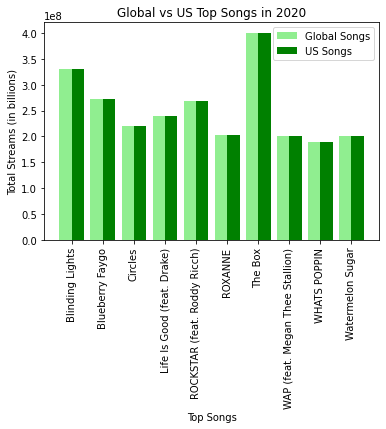

In [46]:
#create x variable 
unique_top_songs = global_vs_us_2020["Songs"]

#define x variable
X = unique_top_songs

#define y variable #1
global_songs = global_vs_us_2020["Global Streams"]

#define y variable #2
us_songs = global_vs_us_2020["US Streams"]

#define length of x-axis
X_axis = np.arange(len(X))

#add colors 
color1 = "lightgreen"
color2 = "green"

#plot y variable #1
plt.bar(X_axis - 0.2, global_songs, 0.4, label = 'Global Songs', color=color1)

#plot y variable #2
plt.bar(X_axis + 0.2, us_songs, 0.4, label = 'US Songs', color=color2)

#plot x ticks
plt.xticks(X_axis, X)

#rotate x ticks
plt.xticks(rotation = 90)

#create labels 
plt.xlabel("Top Songs")
plt.ylabel("Total Streams (in billions)")

#create title 
plt.title("Global vs US Top Songs in 2020")

#plot legend 
plt.legend()

#export chart to pngs
plt.savefig("Global_vs_US_top_songs_2020.png")

#show plot
plt.show()

In [47]:
#find songs that appear on both top lists
both = global_vs_us_2020.loc[(global_vs_us_2020["US Streams"] > 0) & (global_vs_us_2020["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_2020["title"].count()

#find percent of US songs that appear in global top ten
song_percent_2020 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2020}% of the same top ten songs as the global charts in 2020.")

The US charts had 100.0% of the same top ten songs as the global charts in 2020.


Further analysis into the top 100 songs for 2020

In [48]:
#create variable for top songs 
top_songs_20 = top_songs_US_2020_ext["title"]

#append variable to add global top songs 
new_top_2020 = top_songs_20.append(top_songs_2020_ext["title"])

#drop duplicate values
new_top_2020 = new_top_2020.drop_duplicates()

#create variable for US total streams 
us_songs_2020 = top_songs_US_2020_ext["total streams"]

#create variable for global total streams 
global_songs_2020 = top_songs_2020_ext["total streams"]

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_45313/2488367777.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_top_2020 = top_songs_20.append(top_songs_2020_ext["title"])


In [49]:
#create df for global vs us streams 
global_vs_us_2020 = pd.DataFrame({"Songs": new_top_2020, "US Streams": us_songs_2020, "Global Streams": global_songs_2020})

#reset df index
global_vs_us_2020 = global_vs_us_2020.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2020['Global Streams'] = global_vs_us_2020['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2020['US Streams'] = global_vs_us_2020['US Streams'].fillna(0)

#print df
global_vs_us_2020

,Songs,US Streams,Global Streams
0,"10,000 Hours (with Justin Bieber)",102192286.0,102192286.0
1,A Gente Fez Amor - Ao Vivo,0.0,151463282.0
2,Adore You,175384087.0,175384087.0
3,After Party,118482861.0,118482861.0
4,All Girls Are The Same,145489010.0,145489010.0
...,...,...,...
122,goosebumps,126138972.0,126138972.0
123,hot girl bummer,151804421.0,151804421.0
124,lovely (with Khalid),104755992.0,104755992.0
125,rockstar (feat. 21 Savage),83158826.0,0.0


In [50]:
#find songs that appear on both top lists
both = global_vs_us_2020.loc[(global_vs_us_2020["US Streams"] > 0) & (global_vs_us_2020["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_2020_ext["title"].count()

#find percent of US songs that appear in global top ten
song_percent_2020 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2020}% of the same top ten songs as the global charts in 2020.")

The US charts had 64.0% of the same top ten songs as the global charts in 2020.


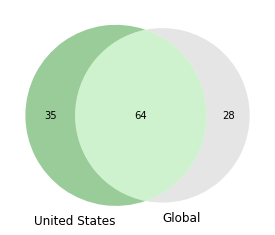

In [51]:
#create venn diagram
venn2([set(top_songs_US_2020_ext["title"]),
       set(top_songs_2020_ext["title"])],
       set_labels=('United States', 'Global'),
       set_colors=('green', 'silver'))

#export chart to pngs
plt.savefig("top_songs_2020_venn.png")

Top Songs 2021

In [52]:
#create datframe for US 2017
df_2021 = regional_df[(regional_df["date"] == 2021)]

#sort df by total streams 
songs_2021 = df_2021.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_2021 = songs_2021.head(10)

#save top 100 rows by streaming 
top_songs_2021_ext = songs_2021.head(100)

#print top ten
top_songs_2021

,date,title,artist,region,total streams
397448,2021,good 4 u,Olivia Rodrigo,United States,316909493.0
396958,2021,drivers license,Olivia Rodrigo,United States,306465075.0
347346,2021,Heat Waves,Glass Animals,United States,274698424.0
354122,2021,Kiss Me More (feat. SZA),Doja Cat,United States,268963860.0
357418,2021,Levitating (feat. DaBaby),Dua Lipa,United States,259084916.0
360743,2021,MONTERO (Call Me By Your Name),Lil Nas X,United States,249089858.0
377469,2021,STAY (with Justin Bieber),The Kid LAROI,United States,241632288.0
373994,2021,RAPSTAR,Polo G,United States,222366492.0
350444,2021,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,United States,217493707.0
396854,2021,deja vu,Olivia Rodrigo,United States,213855457.0


In [53]:
#create datframe for US 2021, why is this the same as previous cell***?
df_US_2021 = regional_df[(regional_df["region"] == "United States") & (regional_df["date"] == 2021)]

#sort df by total streams 
songs_US_2021 = df_US_2021.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_US_2021 = songs_US_2021.head(10)

#save top 100 rows by streaming 
top_songs_US_2021_ext = songs_US_2021.head(100)

#print top ten
top_songs_US_2021

,date,title,artist,region,total streams
397448,2021,good 4 u,Olivia Rodrigo,United States,316909493.0
396958,2021,drivers license,Olivia Rodrigo,United States,306465075.0
347346,2021,Heat Waves,Glass Animals,United States,274698424.0
354122,2021,Kiss Me More (feat. SZA),Doja Cat,United States,268963860.0
357418,2021,Levitating (feat. DaBaby),Dua Lipa,United States,259084916.0
360743,2021,MONTERO (Call Me By Your Name),Lil Nas X,United States,249089858.0
377469,2021,STAY (with Justin Bieber),The Kid LAROI,United States,241632288.0
373994,2021,RAPSTAR,Polo G,United States,222366492.0
350444,2021,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,United States,217493707.0
396854,2021,deja vu,Olivia Rodrigo,United States,213855457.0


In [54]:
#create variable for top songs 
top_songs_21 = top_songs_US_2021["title"]

#append variable to add global top songs 
new_top_2021 = top_songs_21.append(top_songs_2021["title"])

#drop duplicate values
new_top_2021 = new_top_2021.drop_duplicates()

#create variable for US total streams 
us_songs_2021 = top_songs_US_2021["total streams"]

#create variable for global total streams 
global_songs_2021 = top_songs_2021["total streams"]

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_45313/1952631403.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_top_2021 = top_songs_21.append(top_songs_2021["title"])


In [55]:
#create df for global vs us streams 
global_vs_us_2021 = pd.DataFrame({"Songs": new_top_2021, "US Streams": us_songs_2021, "Global Streams": global_songs_2021})

#reset df index
global_vs_us_2021 = global_vs_us_2021.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2021['Global Streams'] = global_vs_us_2021['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2021['US Streams'] = global_vs_us_2021['US Streams'].fillna(0)

#print df
global_vs_us_2021

,Songs,US Streams,Global Streams
0,Heat Waves,274698424.0,274698424.0
1,INDUSTRY BABY (feat. Jack Harlow),217493707.0,217493707.0
2,Kiss Me More (feat. SZA),268963860.0,268963860.0
3,Levitating (feat. DaBaby),259084916.0,259084916.0
4,MONTERO (Call Me By Your Name),249089858.0,249089858.0
5,RAPSTAR,222366492.0,222366492.0
6,STAY (with Justin Bieber),241632288.0,241632288.0
7,deja vu,213855457.0,213855457.0
8,drivers license,306465075.0,306465075.0
9,good 4 u,316909493.0,316909493.0


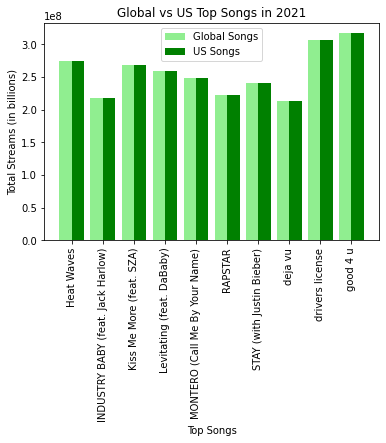

In [56]:

#create x variable 
unique_top_songs = global_vs_us_2021["Songs"]

#define x variable
X = unique_top_songs

#define y variable #1
global_songs = global_vs_us_2021["Global Streams"]

#define y variable #2
us_songs = global_vs_us_2021["US Streams"]

#define length of x-axis
X_axis = np.arange(len(X))

#add colors 
color1 = "lightgreen"
color2 = "green"

#plot y variable #1
plt.bar(X_axis - 0.2, global_songs, 0.4, label = 'Global Songs', color=color1)

#plot y variable #2
plt.bar(X_axis + 0.2, us_songs, 0.4, label = 'US Songs', color=color2)

#plot x ticks
plt.xticks(X_axis, X)

#rotate x ticks
plt.xticks(rotation = 90)

#create labels 
plt.xlabel("Top Songs")
plt.ylabel("Total Streams (in billions)")

#create title 
plt.title("Global vs US Top Songs in 2021")

#plot legend 
plt.legend()

#export chart to pngs
plt.savefig("Global_vs_US_top_songs_2021.png")


#show plot
plt.show()

In [57]:
#find songs that appear on both top lists
both = global_vs_us_2021.loc[(global_vs_us_2021["US Streams"] > 0) & (global_vs_us_2021["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_2021["title"].count()

#find percent of US songs that appear in global top ten
song_percent_2021 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2021}% of the same top ten songs as the global charts in 2021.")

The US charts had 100.0% of the same top ten songs as the global charts in 2021.


Further analysis into the top 100 song in 2021

In [58]:
#create variable for top songs 
top_songs_21 = top_songs_US_2021_ext["title"]

#append variable to add global top songs 
new_top_2021 = top_songs_21.append(top_songs_2021_ext["title"])

#drop duplicate values
new_top_2021 = new_top_2021.drop_duplicates()

#create variable for US total streams 
us_songs_2021 = top_songs_US_2021_ext["total streams"]

#create variable for global total streams 
global_songs_2021 = top_songs_2021_ext["total streams"]

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_45313/3390211838.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_top_2021 = top_songs_21.append(top_songs_2021_ext["title"])


In [59]:
#create df for global vs us streams 
global_vs_us_2021 = pd.DataFrame({"Songs": new_top_2021, "US Streams": us_songs_2021, "Global Streams": global_songs_2021})

#reset df index
global_vs_us_2021 = global_vs_us_2021.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2021['Global Streams'] = global_vs_us_2021['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2021['US Streams'] = global_vs_us_2021['US Streams'].fillna(0)

#print df
global_vs_us_2021

,Songs,US Streams,Global Streams
0,20 Min,98100970.0,98100970.0
1,2055,103181086.0,103181086.0
2,34+35,92195147.0,0.0
3,505,76838609.0,0.0
4,Ain't Shit,99379887.0,99379887.0
...,...,...,...
127,my ex's best friend (with blackbear),131258025.0,131258025.0
128,positions,94432999.0,0.0
129,telepatía,145027902.0,145027902.0
130,traitor,167545529.0,167545529.0


In [60]:
#find songs that appear on both top lists
both = global_vs_us_2021.loc[(global_vs_us_2021["US Streams"] > 0) & (global_vs_us_2021["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_2021_ext["title"].count()

#find percent of US songs that appear in global top ten
song_percent_2021 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2021}% of the same top 100 songs as the global charts in 2021.")

The US charts had 65.0% of the same top 100 songs as the global charts in 2021.


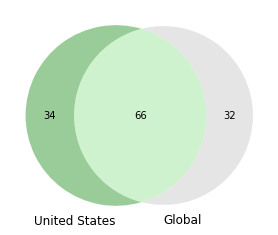

In [61]:
#create venn diagram
venn2([set(top_songs_US_2021_ext["title"]),
       set(top_songs_2021_ext["title"])],
       set_labels=('United States', 'Global'),
       set_colors=('green', 'silver'))

#export chart to pngs
plt.savefig("top_songs_2021_venn.png")

Top Songs Overall 2017-2021

In [62]:
#create datframe for US 2017
df_overall = regional_df

#sort df by total streams 
songs_overall = df_overall.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_overall = songs_overall.head(10)

#save top 100 rows by streaming 
top_songs_overall_ext = songs_overall.head(100)

#print top ten
top_songs_overall

,date,title,artist,region,total streams
91563,2018,God's Plan,Drake,United States,453226629.0
300559,2020,The Box,Roddy Ricch,United States,400892436.0
211054,2019,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",United States,389059531.0
20921,2017,HUMBLE.,Kendrick Lamar,United States,334342280.0
122834,2018,SAD!,XXXTENTACION,United States,332633597.0
237940,2020,Blinding Lights,The Weeknd,United States,331037132.0
397448,2021,good 4 u,Olivia Rodrigo,United States,316909493.0
119442,2018,Psycho (feat. Ty Dolla $ign),Post Malone,United States,306877012.0
396958,2021,drivers license,Olivia Rodrigo,United States,306465075.0
106537,2018,Lucid Dreams,Juice WRLD,United States,299907223.0


In [63]:
#create datframe for US overall
df_US_overall = regional_df[regional_df["region"] == "United States"]

#sort df by total streams 
songs_US_overall = df_US_overall.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_US_overall = songs_US_overall.head(10)

#save top 100 rows by streaming 
top_songs_US_overall_ext = songs_US_overall.head(100)

#print top ten
top_songs_US_overall

,date,title,artist,region,total streams
91563,2018,God's Plan,Drake,United States,453226629.0
300559,2020,The Box,Roddy Ricch,United States,400892436.0
211054,2019,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",United States,389059531.0
20921,2017,HUMBLE.,Kendrick Lamar,United States,334342280.0
122834,2018,SAD!,XXXTENTACION,United States,332633597.0
237940,2020,Blinding Lights,The Weeknd,United States,331037132.0
397448,2021,good 4 u,Olivia Rodrigo,United States,316909493.0
119442,2018,Psycho (feat. Ty Dolla $ign),Post Malone,United States,306877012.0
396958,2021,drivers license,Olivia Rodrigo,United States,306465075.0
106537,2018,Lucid Dreams,Juice WRLD,United States,299907223.0


In [64]:
#create variable for top songs 
top_songs_all = top_songs_US_overall["title"]

#append variable to add global top songs 
new_top_overall = top_songs_all.append(top_songs_overall["title"])

new_top_overall = new_top_overall.drop_duplicates()
#create variable for US total streams 
us_songs_overall = top_songs_US_overall["total streams"]

#create variable for global total streams 
global_songs_overall = top_songs_overall["total streams"]

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_45313/1940168793.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_top_overall = top_songs_all.append(top_songs_overall["title"])


In [65]:
#create df for global vs us streams 
global_vs_us_overall = pd.DataFrame({"Songs": new_top_overall, "US Streams": us_songs_overall, "Global Streams": global_songs_overall})

#reset df index
global_vs_us_overall = global_vs_us_overall.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_overall['Global Streams'] = global_vs_us_overall['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_overall['US Streams'] = global_vs_us_overall['US Streams'].fillna(0)

#print df
global_vs_us_overall


,Songs,US Streams,Global Streams
0,Blinding Lights,331037132.0,331037132.0
1,God's Plan,453226629.0,453226629.0
2,HUMBLE.,334342280.0,334342280.0
3,Lucid Dreams,299907223.0,299907223.0
4,Psycho (feat. Ty Dolla $ign),306877012.0,306877012.0
5,SAD!,332633597.0,332633597.0
6,Sunflower - Spider-Man: Into the Spider-Verse,389059531.0,389059531.0
7,The Box,400892436.0,400892436.0
8,drivers license,306465075.0,306465075.0
9,good 4 u,316909493.0,316909493.0


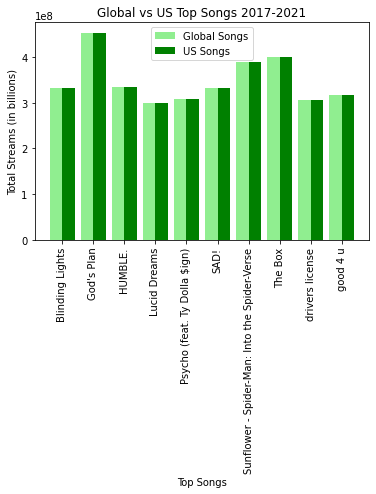

In [66]:
#create x variable 
unique_top_songs = global_vs_us_overall["Songs"]

#define x variable
X = unique_top_songs

#define y variable #1
global_songs = global_vs_us_overall["Global Streams"]

#define y variable #2
us_songs = global_vs_us_overall["US Streams"]

#define length of x-axis
X_axis = np.arange(len(X))

#add colors 
color1 = "lightgreen"
color2 = "green"

#plot y variable #1
plt.bar(X_axis - 0.2, global_songs, 0.4, label = 'Global Songs', color=color1)

#plot y variable #2
plt.bar(X_axis + 0.2, us_songs, 0.4, label = 'US Songs', color=color2)

#plot x ticks
plt.xticks(X_axis, X)

#rotate x ticks
plt.xticks(rotation = 90)

#create labels 
plt.xlabel("Top Songs")
plt.ylabel("Total Streams (in billions)")

#create title 
plt.title("Global vs US Top Songs 2017-2021")

#plot legend 
plt.legend()

#export chart to pngs
plt.savefig("Global_vs_US_top_songs_overall.png")

#show plot
plt.show()

In [67]:
#find songs that appear on both top lists
both = global_vs_us_overall.loc[(global_vs_us_overall["US Streams"] > 0) & (global_vs_us_overall["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_overall["title"].count()

#find percent of US songs that appear in global top ten
song_percent_overall = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_overall}% of the same top ten songs as the global charts 2017-2021.")

The US charts had 100.0% of the same top ten songs as the global charts 2017-2021.


In [68]:
#create variable for top songs 
top_songs_all = top_songs_US_overall_ext["title"]

#append variable to add global top songs 
new_top_overall = top_songs_all.append(top_songs_overall_ext["title"])

#drop duplicate values 
new_top_overall = new_top_overall.drop_duplicates()

#create variable for US total streams 
us_songs_overall = top_songs_US_overall_ext["total streams"]

#create variable for global total streams 
global_songs_overall = top_songs_overall_ext["total streams"]

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_45313/3029379269.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_top_overall = top_songs_all.append(top_songs_overall_ext["title"])


In [69]:
#create df for global vs us streams 
global_vs_us_overall = pd.DataFrame({"Songs": new_top_overall, "US Streams": us_songs_overall, "Global Streams": global_songs_overall})

#reset df index
global_vs_us_overall = global_vs_us_overall.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_overall['Global Streams'] = global_vs_us_overall['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_overall['US Streams'] = global_vs_us_overall['US Streams'].fillna(0)

#print df
global_vs_us_overall

,Songs,US Streams,Global Streams
0,1-800-273-8255,216950629.0,216950629.0
1,7 rings,280698165.0,280698165.0
2,Adore You,175384087.0,175384087.0
3,All The Stars (with SZA),185113340.0,185113340.0
4,Bad and Boujee (feat. Lil Uzi Vert),209209558.0,209209558.0
...,...,...,...
91,iSpy (feat. Lil Yachty),224773101.0,224773101.0
92,rockstar,225517132.0,225517132.0
93,"thank u, next",182180801.0,182180801.0
94,traitor,167545529.0,0.0


In [70]:
#find songs that appear on both top lists
both = global_vs_us_overall.loc[(global_vs_us_overall["US Streams"] > 0) & (global_vs_us_overall["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = top_songs_overall_ext["title"].count()

#find percent of US songs that appear in global top ten
song_percent_overall = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_overall}% of the same top 100 songs as the global charts 2017-2021.")

The US charts had 92.0% of the same top 100 songs as the global charts 2017-2021.


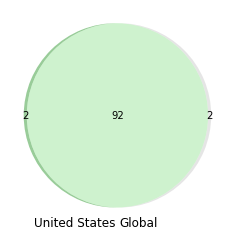

In [71]:
#create venn diagram 
venn2([set(top_songs_US_overall_ext["title"]),
       set(top_songs_overall_ext["title"])],
       set_labels=('United States', 'Global'),
       set_colors=('green', 'silver'))

#export chart to pngs
plt.savefig("top_songs_overall_venn.png")

In [72]:
# create ne data frame that only includes songs and streaming data from 2017
df_2017_all = chart_data[(chart_data["date"] == 2017)]

# sort data frame by total streams to determine the most popular song from this year
all_songs_2017 = df_2017_all.sort_values('total streams', ascending = False)

all_songs_2017

,date,title,artist,region,total streams
48188,2017,Shape of You,Ed Sheeran,Global,1.479857e+09
12958,2017,Despacito - Remix,"Luis Fonsi, Daddy Yankee, Justin Bieber",Global,9.085726e+08
12901,2017,Despacito (Featuring Daddy Yankee),Luis Fonsi,Global,7.391564e+08
50763,2017,Something Just Like This,"The Chainsmokers, Coldplay",Global,6.864717e+08
20887,2017,HUMBLE.,Kendrick Lamar,Global,6.504118e+08
...,...,...,...,...,...
36319,2017,Muy Personal (feat. J Balvin),Yandel,Panama,1.001000e+03
9634,2017,Chantaje (feat. Maluma),Shakira,Luxembourg,1.001000e+03
35602,2017,Mit Mondjak Még,Kowalsky Meg A Vega,Hungary,1.001000e+03
4270,2017,"Baby, You Make Me Crazy",Sam Smith,Hungary,1.001000e+03


In [73]:
# create df for the most streamed song from this year sorted by top contributing regions (excluding global)
shape_of_you = all_songs_2017[(all_songs_2017["title"] == "Shape of You") & (chart_data["region"] != "Global")]
shape_of_you

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_45313/3683089355.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  shape_of_you = all_songs_2017[(all_songs_2017["title"] == "Shape of You") & (chart_data["region"] != "Global")]


,date,title,artist,region,total streams
48223,2017,Shape of You,Ed Sheeran,United States,278916058.0
48222,2017,Shape of You,Ed Sheeran,United Kingdom,130658891.0
48187,2017,Shape of You,Ed Sheeran,Germany,96505235.0
48173,2017,Shape of You,Ed Sheeran,Brazil,95996545.0
48203,2017,Shape of You,Ed Sheeran,Mexico,86326454.0
48217,2017,Shape of You,Ed Sheeran,Sweden,63184448.0
48216,2017,Shape of You,Ed Sheeran,Spain,60057135.0
48211,2017,Shape of You,Ed Sheeran,Philippines,57245668.0
48204,2017,Shape of You,Ed Sheeran,Netherlands,55204354.0
48169,2017,Shape of You,Ed Sheeran,Australia,51174073.0


In [110]:
# check your work, if correct should be less than or equal to 68 (total number of regions in original data frame)
len(shape_of_you)

56

In [74]:
# truncate the data frame to only include the top ten countries by stream contribution for this song
shape_top = shape_of_you.head(10)
shape_top

,date,title,artist,region,total streams
48223,2017,Shape of You,Ed Sheeran,United States,278916058.0
48222,2017,Shape of You,Ed Sheeran,United Kingdom,130658891.0
48187,2017,Shape of You,Ed Sheeran,Germany,96505235.0
48173,2017,Shape of You,Ed Sheeran,Brazil,95996545.0
48203,2017,Shape of You,Ed Sheeran,Mexico,86326454.0
48217,2017,Shape of You,Ed Sheeran,Sweden,63184448.0
48216,2017,Shape of You,Ed Sheeran,Spain,60057135.0
48211,2017,Shape of You,Ed Sheeran,Philippines,57245668.0
48204,2017,Shape of You,Ed Sheeran,Netherlands,55204354.0
48169,2017,Shape of You,Ed Sheeran,Australia,51174073.0


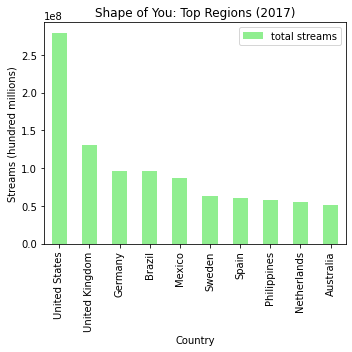

In [80]:
# create bar plot to better visualize each country's contribution 
shape_bar = shape_top.plot.bar(x='region', y='total streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

# add title
plt.title("Shape of You: Top Regions (2017)")

# label xaxis
plt.xlabel("Country")

# lable yaxis
plt.ylabel("Streams (hundred millions)")

# adjust graph layout 
plt.tight_layout()

# export chart to pngs
plt.savefig("Shape_Top_Ten_Countries.png")

# show graph 
plt.show()   

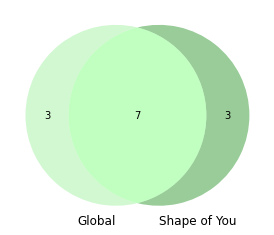

In [81]:
# create venn diagram for easier visual analysis
venn2([set(top_ten.index), 
       set(shape_top['region'].to_list())],
       set_labels=('Global', 'Shape of You'),
       set_colors=('lightgreen', 'green'),
     )

In [82]:
# create ne data frame that only includes songs and streaming data from 2018
all_songs_18 = chart_data[(chart_data["date"] == 2018)]

# sort data frame by total streams to determine the most popular song from this year
top_songs_18 = all_songs_18.sort_values('total streams', ascending = False)

top_songs_18

,date,title,artist,region,total streams
91525,2018,God's Plan,Drake,Global,1.126032e+09
122797,2018,SAD!,XXXTENTACION,Global,7.640701e+08
119406,2018,Psycho (feat. Ty Dolla $ign),Post Malone,Global,7.023187e+08
98407,2018,In My Feelings,Drake,Global,7.021119e+08
74624,2018,Better Now,Post Malone,Global,6.860381e+08
...,...,...,...,...,...
127129,2018,Slide,James Bay,Slovakia,1.001000e+03
130696,2018,Sweet Child O' Mine,Guns N' Roses,Honduras,1.001000e+03
134481,2018,Through It All,Charlie Puth,Vietnam,1.001000e+03
91285,2018,Glitch,"Martin Garrix, Julian Jordan",Estonia,1.001000e+03


In [83]:
# create df for the most streamed song from this year sorted by top contributing regions (excluding global)
gods_plan = top_songs_18[(top_songs_18["title"] == "God's Plan") & (chart_data["region"] != "Global")]
gods_plan

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_45313/222214662.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gods_plan = top_songs_18[(top_songs_18["title"] == "God's Plan") & (chart_data["region"] != "Global")]


,date,title,artist,region,total streams
91563,2018,God's Plan,Drake,United States,453226629.0
91562,2018,God's Plan,Drake,United Kingdom,98750702.0
91512,2018,God's Plan,Drake,Canada,55809118.0
91524,2018,God's Plan,Drake,Germany,51393253.0
91506,2018,God's Plan,Drake,Australia,48905021.0
91510,2018,God's Plan,Drake,Brazil,45265461.0
91541,2018,God's Plan,Drake,Mexico,44443961.0
91542,2018,God's Plan,Drake,Netherlands,33744946.0
91523,2018,God's Plan,Drake,France,27576637.0
91557,2018,God's Plan,Drake,Sweden,27111313.0


In [109]:
# check your work, if correct should be less than or equal to 68 
len(gods_plan)

60

In [108]:
# truncate the data frame to only include the top ten countries by stream contribution for this song
gp_top = gods_plan.head(10)
gp_top

,date,title,artist,region,total streams
91563,2018,God's Plan,Drake,United States,453226629.0
91562,2018,God's Plan,Drake,United Kingdom,98750702.0
91512,2018,God's Plan,Drake,Canada,55809118.0
91524,2018,God's Plan,Drake,Germany,51393253.0
91506,2018,God's Plan,Drake,Australia,48905021.0
91510,2018,God's Plan,Drake,Brazil,45265461.0
91541,2018,God's Plan,Drake,Mexico,44443961.0
91542,2018,God's Plan,Drake,Netherlands,33744946.0
91523,2018,God's Plan,Drake,France,27576637.0
91557,2018,God's Plan,Drake,Sweden,27111313.0


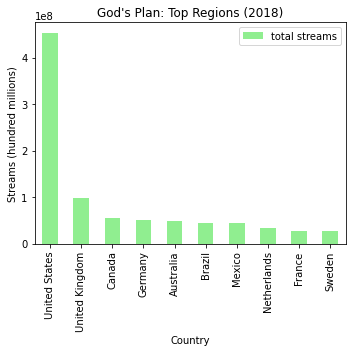

In [86]:
# create bar plot to better visualize each of the top ten country's contribution 
gp_bar = gp_top.plot.bar(x='region', y='total streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

# add title
plt.title("God's Plan: Top Regions (2018)")

# label xaxis
plt.xlabel("Country")

# lable yaxis
plt.ylabel("Streams (hundred millions)")

# adjust graph layout 
plt.tight_layout()

# export chart to pngs
plt.savefig("gods_plan_top ten_countries.png")

# show graph 
plt.show()   

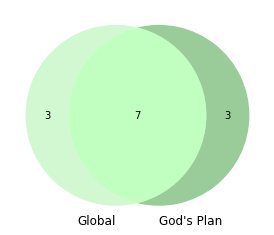

In [87]:
# create a venn diagram to show how many of the overall top contries contributed to this song 
venn2([set(top_ten.index), 
       set(gp_top['region'].to_list())],
       set_labels=('Global', "God's Plan"),
       set_colors=('lightgreen', 'green'),
     )

In [88]:
# filter data frame to only display songs from 2019
all_songs_2019 = chart_data[(chart_data["date"] == 2019)]

# sort dataframe by total streams (in descending order) to determine the most popular song from this year 
sorted_songs_2019 = all_songs_2019.sort_values('total streams', ascending = False)

sorted_songs_2019

,date,title,artist,region,total streams
206911,2019,Señorita,"Shawn Mendes, Camila Cabello",Global,1.070268e+09
222870,2019,bad guy,Billie Eilish,Global,1.052359e+09
211012,2019,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",Global,9.869068e+08
150418,2019,7 rings,Ariana Grande,Global,9.613615e+08
209271,2019,Someone You Loved,Lewis Capaldi,Global,8.237803e+08
...,...,...,...,...,...
206266,2019,Scared to Be Lonely,"Martin Garrix, Dua Lipa",Saudi Arabia,1.001000e+03
178455,2019,I Think He Knows,Taylor Swift,Latvia,1.001000e+03
201530,2019,Putana,Ninho,Morocco,1.001000e+03
161408,2019,Clout (feat. Cardi B),Offset,Latvia,1.001000e+03


In [90]:
# create df for the most streamed song from this year sorted by top contributing regions (excluding global)
señorita = sorted_songs_2019[(sorted_songs_2019["title"] == "Señorita") & (chart_data["artist"] == "Shawn Mendes, Camila Cabello") & (chart_data["region"] != "Global")]
# this year had multiple songs named "señorita" so an extra filter for artist had to be added above 
señorita

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_45313/2625393087.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  señorita = sorted_songs_2019[(sorted_songs_2019["title"] == "Señorita") & (chart_data["artist"] == "Shawn Mendes, Camila Cabello") & (chart_data["region"] != "Global")]


,date,title,artist,region,total streams
206953,2019,Señorita,"Shawn Mendes, Camila Cabello",United States,178554964.0
206910,2019,Señorita,"Shawn Mendes, Camila Cabello",Germany,68105088.0
206928,2019,Señorita,"Shawn Mendes, Camila Cabello",Mexico,64803176.0
206952,2019,Señorita,"Shawn Mendes, Camila Cabello",United Kingdom,57663930.0
206895,2019,Señorita,"Shawn Mendes, Camila Cabello",Brazil,57029178.0
...,...,...,...,...,...
206896,2019,Señorita,"Shawn Mendes, Camila Cabello",Bulgaria,584978.0
206929,2019,Señorita,"Shawn Mendes, Camila Cabello",Morocco,452441.0
206932,2019,Señorita,"Shawn Mendes, Camila Cabello",Nicaragua,405426.0
206905,2019,Señorita,"Shawn Mendes, Camila Cabello",Egypt,227496.0


In [111]:
# check your work, if correct should be less than or equal to 68 (total number of regions in original df)
len(señorita)

65

In [92]:
# truncate the data frame to only include the top ten countries by stream contribution for this song
señorita_top = señorita.head(10)
señorita_top

,date,title,artist,region,total streams
206953,2019,Señorita,"Shawn Mendes, Camila Cabello",United States,178554964.0
206910,2019,Señorita,"Shawn Mendes, Camila Cabello",Germany,68105088.0
206928,2019,Señorita,"Shawn Mendes, Camila Cabello",Mexico,64803176.0
206952,2019,Señorita,"Shawn Mendes, Camila Cabello",United Kingdom,57663930.0
206895,2019,Señorita,"Shawn Mendes, Camila Cabello",Brazil,57029178.0
206919,2019,Señorita,"Shawn Mendes, Camila Cabello",Indonesia,52376276.0
206937,2019,Señorita,"Shawn Mendes, Camila Cabello",Philippines,42483717.0
206930,2019,Señorita,"Shawn Mendes, Camila Cabello",Netherlands,39025222.0
206897,2019,Señorita,"Shawn Mendes, Camila Cabello",Canada,37173138.0
206891,2019,Señorita,"Shawn Mendes, Camila Cabello",Australia,37083727.0


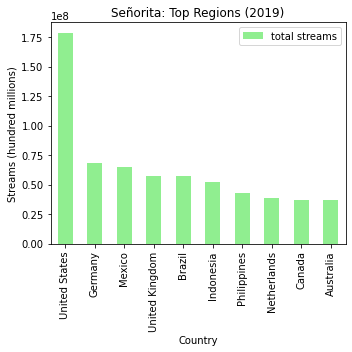

In [93]:
#create bar plot to show top 10 countries streams 
señorita_bar = señorita_top.plot.bar(x='region', y='total streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Señorita: Top Regions (2019)")

#label xaxis
plt.xlabel("Country")

#lable yaxis
plt.ylabel("Streams (hundred millions)")

# top_countries_plot.bar_label(top_countries["total streams"], label_type='edge')

#adjust graph layout 
plt.tight_layout()

#export chart to pngs
plt.savefig("señorita_top_countries.png")

#show graph 
plt.show()   

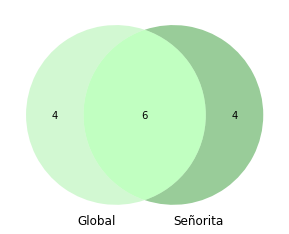

In [94]:
# create diagram to visualize how many of the top streaming contries were also a top contributor for this song 
venn2([set(top_ten.index), 
       set(señorita_top['region'].to_list())],
       set_labels=('Global', 'Señorita'),
       set_colors=('lightgreen', 'green'),
     )

In [95]:
# filter data frame to only display songs and streaming data for 2020
all_songs_2020 = chart_data[(chart_data["date"] == 2020)]

# sort dataframe by total streams (in descending order) to determine the most popular song from this year 
sorted_songs_2020 = all_songs_2020.sort_values('total streams', ascending = False)
sorted_songs_2020


,date,title,artist,region,total streams
237896,2020,Blinding Lights,The Weeknd,Global,1.645923e+09
244984,2020,Dance Monkey,Tones And I,Global,1.196398e+09
289202,2020,Roses - Imanbek Remix,SAINt JHN,Global,1.040359e+09
300515,2020,The Box,Roddy Ricch,Global,1.036463e+09
247554,2020,Don't Start Now,Dua Lipa,Global,1.025911e+09
...,...,...,...,...,...
317148,2020,ده و ده,"Wegz, Abyusif",Egypt,1.001000e+03
251030,2020,F33l Lik3 Dyin,Playboi Carti,Bulgaria,1.001000e+03
284444,2020,Piccola,ElGrandeToto,Morocco,1.001000e+03
309286,2020,X5,"Kastrācija, Steps",Latvia,1.001000e+03


In [96]:
# create df for the most streamed song from this year sorted by top contributing regions (excluding global)
bl_2020 = sorted_songs_2020[(sorted_songs_2020["title"] == "Blinding Lights") & (chart_data["region"] != "Global")]
bl_2020

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_45313/2387790388.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bl_2020 = sorted_songs_2020[(sorted_songs_2020["title"] == "Blinding Lights") & (chart_data["region"] != "Global")]


,date,title,artist,region,total streams
237940,2020,Blinding Lights,The Weeknd,United States,331037132.0
237913,2020,Blinding Lights,The Weeknd,Mexico,144665106.0
237895,2020,Blinding Lights,The Weeknd,Germany,122234476.0
237939,2020,Blinding Lights,The Weeknd,United Kingdom,113847572.0
237880,2020,Blinding Lights,The Weeknd,Brazil,81100838.0
...,...,...,...,...,...
237881,2020,Blinding Lights,The Weeknd,Bulgaria,1170664.0
237917,2020,Blinding Lights,The Weeknd,Nicaragua,1055299.0
237914,2020,Blinding Lights,The Weeknd,Morocco,1052058.0
237890,2020,Blinding Lights,The Weeknd,Egypt,936518.0


In [112]:
# check your work, if correct should be less than or equal to 68 (total number of regions in original df)
len(bl_2020)

67

In [97]:
# truncate the data frame to only include the top ten countries by stream contribution for this song
bl_2020_top = bl_2020.head(10)
bl_2020_top

,date,title,artist,region,total streams
237940,2020,Blinding Lights,The Weeknd,United States,331037132.0
237913,2020,Blinding Lights,The Weeknd,Mexico,144665106.0
237895,2020,Blinding Lights,The Weeknd,Germany,122234476.0
237939,2020,Blinding Lights,The Weeknd,United Kingdom,113847572.0
237880,2020,Blinding Lights,The Weeknd,Brazil,81100838.0
237876,2020,Blinding Lights,The Weeknd,Australia,67035682.0
237894,2020,Blinding Lights,The Weeknd,France,65948733.0
237915,2020,Blinding Lights,The Weeknd,Netherlands,54929038.0
237932,2020,Blinding Lights,The Weeknd,Sweden,54271651.0
237882,2020,Blinding Lights,The Weeknd,Canada,54075826.0


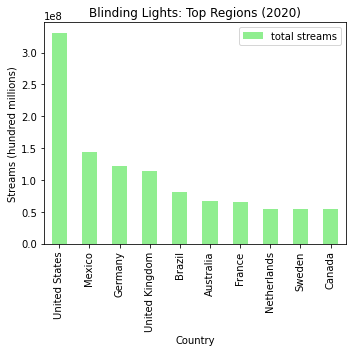

In [98]:
# create bar plot to visualize how each of these top countries contributed 
bl_bar_2020 = bl_2020_top.plot.bar(x='region', y='total streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

# add title
plt.title("Blinding Lights: Top Regions (2020)")

# label xaxis
plt.xlabel("Country")

# lable yaxis
plt.ylabel("Streams (hundred millions)")

# top_countries_plot.bar_label(top_countries["total streams"], label_type='edge')

# adjust graph layout 
plt.tight_layout()

# export chart to pngs
plt.savefig("blinding_lights_2020_top_countries.png")

# show graph 
plt.show() 

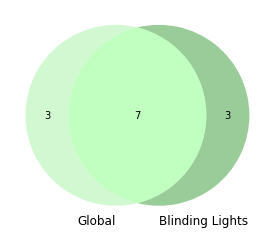

In [99]:
# create diagram to visualize how many of the top streaming contries were also a top contributor for this song 
venn2([set(top_ten.index), 
       set(bl_2020_top['region'].to_list())],
       set_labels=('Global', 'Blinding Lights'),
       set_colors=('lightgreen', 'green'),
     )

In [100]:
# create new data frame that only includes songs and streaming data for 2021
all_songs_2021 = chart_data[(chart_data["date"] == 2021)]

# sort data frame by total streams to determine the most popular song from this year
sorted_songs_2021 = all_songs_2021.sort_values('total streams', ascending = False)

sorted_songs_2021

,date,title,artist,region,total streams
396913,2021,drivers license,Olivia Rodrigo,Global,1.166101e+09
377424,2021,STAY (with Justin Bieber),The Kid LAROI,Global,1.165565e+09
360698,2021,MONTERO (Call Me By Your Name),Lil Nas X,Global,1.129255e+09
397403,2021,good 4 u,Olivia Rodrigo,Global,1.099668e+09
357373,2021,Levitating (feat. DaBaby),Dua Lipa,Global,9.595836e+08
...,...,...,...,...,...
350171,2021,I'm Not The Only One,Sam Smith,Nicaragua,1.001000e+03
334949,2021,Dangerous,"Kardinal Offishall, Akon",Lithuania,1.001000e+03
378497,2021,Save That Shit,Lil Peep,Latvia,1.001000e+03
383652,2021,"Supersonic (My Existence) [with Noisia, josh p...",Skrillex,Estonia,1.001000e+03


In [101]:
# create df for the most streamed song from this year sorted by top contributing regions (excluding global)
drivers_license = sorted_songs_2021[(sorted_songs_2021["title"] == "drivers license") & (chart_data["region"] != "Global")]
drivers_license

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_45313/3676484315.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  drivers_license = sorted_songs_2021[(sorted_songs_2021["title"] == "drivers license") & (chart_data["region"] != "Global")]


,date,title,artist,region,total streams
396958,2021,drivers license,Olivia Rodrigo,United States,306465075.0
396957,2021,drivers license,Olivia Rodrigo,United Kingdom,81402221.0
396893,2021,drivers license,Olivia Rodrigo,Australia,53383305.0
396897,2021,drivers license,Olivia Rodrigo,Brazil,52823280.0
396930,2021,drivers license,Olivia Rodrigo,Mexico,51591263.0
...,...,...,...,...,...
396934,2021,drivers license,Olivia Rodrigo,Nicaragua,561353.0
396898,2021,drivers license,Olivia Rodrigo,Bulgaria,519498.0
396955,2021,drivers license,Olivia Rodrigo,Ukraine,510396.0
396931,2021,drivers license,Olivia Rodrigo,Morocco,440354.0


In [113]:
# check your work, if correct should be less than or equal to 68 (total number of regions in original df)
len(drivers_license)

68

In [107]:
# truncate the data frame to only include the top ten countries by stream contribution for this song
drivers_license_top = drivers_license.head(10)
drivers_license_top

,date,title,artist,region,total streams
396958,2021,drivers license,Olivia Rodrigo,United States,306465075.0
396957,2021,drivers license,Olivia Rodrigo,United Kingdom,81402221.0
396893,2021,drivers license,Olivia Rodrigo,Australia,53383305.0
396897,2021,drivers license,Olivia Rodrigo,Brazil,52823280.0
396930,2021,drivers license,Olivia Rodrigo,Mexico,51591263.0
396939,2021,drivers license,Olivia Rodrigo,Philippines,50715870.0
396912,2021,drivers license,Olivia Rodrigo,Germany,48208058.0
396921,2021,drivers license,Olivia Rodrigo,Indonesia,43175395.0
396899,2021,drivers license,Olivia Rodrigo,Canada,42631131.0
396932,2021,drivers license,Olivia Rodrigo,Netherlands,32669908.0


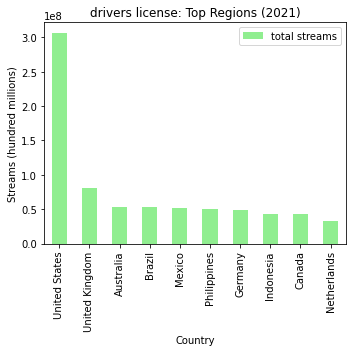

In [105]:
#create bar plot to show top 10 countries streams 
drivers_license_bar = drivers_license_top.plot.bar(x='region', y='total streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("drivers license: Top Regions (2021)")

#label xaxis
plt.xlabel("Country")

#lable yaxis
plt.ylabel("Streams (hundred millions)")

# top_countries_plot.bar_label(top_countries["total streams"], label_type='edge')

#adjust graph layout 
plt.tight_layout()

#export chart to pngs
plt.savefig("drivers_license_top_countries.png")

#show graph 
plt.show()

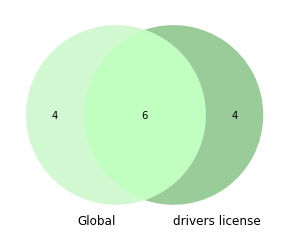

In [106]:
# create venn diagram to visualize how many of the top streaming contries were also a top contributor for song 
venn2([set(top_ten.index), 
       set(drivers_license_top['region'].to_list())],
       set_labels=('Global', 'drivers license'),
       set_colors=('lightgreen', 'green'),
     )

Question 3
Which artists were the most influential globally (broken down by year)?

In [ ]:
#group 2017 dataframe by artist
artist_2017 = df_2017.groupby("artist")

#sum total streams for each artists and sort to find top ten
top_artist_2017 = artist_2017["total streams"].sum().sort_values(ascending=False).head(10)

#print top artists 2021 
top_artist_2017

In [ ]:
#plot top ten artists 2017
artists_2017_plot = top_artist_2017.plot.bar(x = 'artist', y='streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Top Ten Artists Globally By Streaming in 2017")

#label xaxis
plt.xlabel("Artist")

#lable yaxis
plt.ylabel("Streams (in billions)")

#show graph 
plt.show() 

In [ ]:
#group 2018 dataframe by artist
artist_2018 = df_2018.groupby("artist")

#sum total streams for each artists and sort to find top ten
top_artist_2018 = artist_2018["total streams"].sum().sort_values(ascending=False).head(10)

#print top artists 2021 
top_artist_2018

In [ ]:
#plot top ten artists 2018 
artists_2018_plot = top_artist_2018.plot.bar(x = 'artist', y='streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Top Ten Artists Globally By Streaming in 2018")

#label xaxis
plt.xlabel("Artist")

#lable yaxis
plt.ylabel("Streams (in billions)")

#show graph 
plt.show() 

In [ ]:
#group 2019 dataframe by artist
artist_2019 = df_2019.groupby("artist")

#sum total streams for each artists and sort to find top ten
top_artist_2019 = artist_2019["total streams"].sum().sort_values(ascending=False).head(10)

#print top artists 2021 
top_artist_2019

In [ ]:
#plot top ten artists 2021 
artists_2019_plot = top_artist_2019.plot.bar(x = 'artist', y='streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Top Ten Artists Globally By Streaming in 2019")

#label xaxis
plt.xlabel("Artist")

#lable yaxis
plt.ylabel("Streams (in billions)")

#show graph 
plt.show()  

In [ ]:
#group 2020 dataframe by artist
artist_2020 = df_2020.groupby("artist")

#sum total streams for each artists and sort to find top ten
top_artist_2020 = artist_2020["total streams"].sum().sort_values(ascending=False).head(10)

#print top artists 2020 
top_artist_2020

In [ ]:
#plot top ten artists 2021 
artists_2020_plot = top_artist_2020.plot.bar(x = 'artist', y='streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Top Ten Artists Globally By Streaming in 2020")

#label xaxis
plt.xlabel("Artist")

#lable yaxis
plt.ylabel("Streams (in billions)")

#show graph 
plt.show()  

In [ ]:
#group 2021 dataframe by artist
artist_2021 = df_2021.groupby("artist")

#sum total streams for each artists and sort to find top ten
top_artist_2021 = artist_2021["total streams"].sum().sort_values(ascending=False).head(10)

#print top artists 2021 
top_artist_2021

In [ ]:
#plot top ten artists 2021 
artists_2021_plot = top_artist_2021.plot.bar(x = 'artist', y='streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Top Ten Artists Globally By Streaming in 2021")

#label xaxis
plt.xlabel("Artist")

#lable yaxis
plt.ylabel("Streams (in billions)")

#show graph 
plt.show() 